We have to transform the data into polynomial form before applying linear regression 
What is polynomial regression
In linear regression, we fit a straight line (y = mx + c).
But in polynomial regression, we fit a curved line by adding higher-degree terms (like x², x³, etc.).
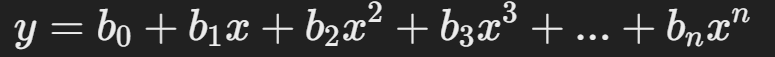

Why Use Polynomial Regression?
When data points do not fit a straight line.
Helps in capturing non-linear relationships.

Steps to Perform Polynomial Regression
Collect data (e.g., predicting house prices based on area).
Preprocess data (clean and normalize if needed).
Choose the degree of the polynomial (higher degrees allow more flexibility).
Train the model (use libraries like sklearn in Python).
Test & evaluate (check accuracy and avoid overfitting).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
url = "https://raw.githubusercontent.com/content-anu/dataset-polynomial-regression/master/Position_Salaries.csv"
df=pd.read_csv(url,index_col=0)
df.head(10)

,Level,Salary
Position,,
Business Analyst,1,45000
Junior Consultant,2,50000
Senior Consultant,3,60000
Manager,4,80000
Country Manager,5,110000
Region Manager,6,150000
Partner,7,200000
Senior Partner,8,300000
C-level,9,500000


In [4]:
X=df.Level.values
Y=df.Salary.values

In [5]:
print(X.shape)
print(Y.shape)

(10,)
(10,)


In [6]:
X = X.reshape(-1, 1)  
Y = Y.reshape(-1, 1)  

In [7]:
from sklearn.linear_model import LinearRegression 

# Create the model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X, Y)

# Predict on new data
y_pred = lin_reg.predict(Y)  # Or use a separate test set


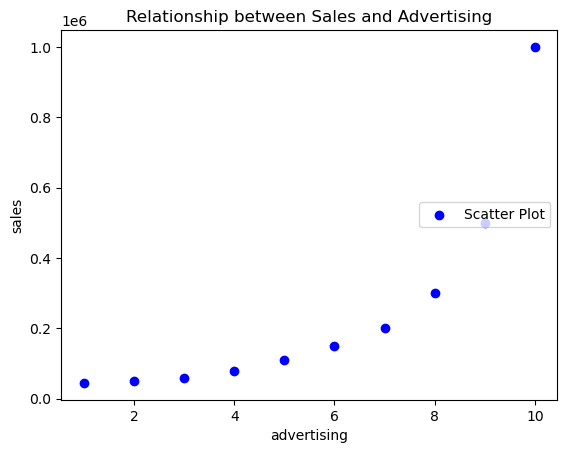

In [8]:
# Making a scatter plot
plt.scatter(X, Y, color = 'blue', label = 'Scatter Plot')
plt.title('Relationship between Sales and Advertising')
plt.xlabel('advertising')
plt.ylabel('sales')
plt.legend(loc = 5)
plt.show()

In [9]:
from sklearn.preprocessing import PolynomialFeatures  # Correct spelling

poly_reg = PolynomialFeatures(degree=3)  # Create a polynomial transformer
X_poly = poly_reg.fit_transform(X)  # Transform X into polynomial features


just Fit u train the data fit.transform when u want to transform and fit a data

In [11]:
X_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [12]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [13]:
X_poly.shape

(10, 4)

In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



# Create and train the model
lin_reg = LinearRegression()
lin_reg.fit(X, Y)

# Predict on x
y_pred = lin_reg.predict(X)

# Calculate R2 Score
r2 = r2_score(Y, y_pred)
print("R² Score:", round(r2, 4))


R² Score: 0.669


# Using Polynomial Regression to reduce the R2 score in the second assignment

In [16]:
df = pd.read_csv(r"C:\Users\PRISHA\OneDrive\Desktop\SML datasets and files\Assignment 2 Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [17]:
x=df[['TV','Radio','Newspaper']]
y=df['Sales']

In [18]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



# Create and train the model
lin_reg = LinearRegression()
lin_reg.fit(x, y)

# Predict on x
y_pred = lin_reg.predict(x)

# Calculate R2 Score
r2 = r2_score(y, y_pred)
print("R² Score:", round(r2, 4))

R² Score: 0.8972


In [19]:
from sklearn.preprocessing import PolynomialFeatures  # Correct spelling

poly_reg = PolynomialFeatures(degree=3)  # Create a polynomial transformer
X_poly = poly_reg.fit_transform(x)  # Transform X into polynomial features


In [20]:
x.shape

(200, 3)

In [21]:
y.shape

(200,)

In [26]:
import numpy as np
from sklearn.model_selection import train_test_split

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Check shapes after splitting
print("Train set:", x_train.shape, y_train.shape)
print("Test set:", x_test.shape, y_test.shape)


Train set: (160, 3) (160,)
Test set: (40, 3) (40,)


In [28]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



# Step 1: Transform X using Polynomial Features
poly = PolynomialFeatures(degree=3)  
X_poly = poly.fit_transform(x)  # Fit and transform X

# Step 2: Train the Polynomial Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)  # Fit on transformed features

# Step 3: Predict using the same transformed X_poly
y_pred = lin_reg.predict(X_poly)

# Step 4: Calculate R2 Score
r2 = r2_score(y, y_pred)
print("R² Score:", round(r2, 4))


R² Score: 0.9921


In [36]:
y_pred = lin_reg.predict(x_test)  # Use only the test data for predictions


C:\Users\PRISHA\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: X has 3 features, but LinearRegression is expecting 20 features as input.

In [32]:
print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)


y_test shape: (40,)
y_pred shape: (200,)


In [30]:

# Ensure X and Y are of the same size before plotting
if len(y_test) == len(y_pred):
    plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
    plt.plot(y_test, y_pred, color='red', linewidth=2, label='Regression Line')

    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title("Actual vs Predicted Sales")
    plt.legend()
    plt.show()
else:
    print("Error: y_test and y_pred have different lengths.")


Error: y_test and y_pred have different lengths.
